<a href="https://colab.research.google.com/github/hellocrisel/data-science/blob/main/Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ExtraaLearn Project**
##**Context**

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like



  *   The customer interacts with the marketing front on social media or
      other online platforms.
  *   The customer browses the website/app and downloads the brochure
  *   The customer connects through emails for more information.


The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

##**Objective**

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

  *  Analyze and build an ML model to help identify which leads are more   
     likely to convert to paid customers,
  *  Find the factors driving the lead conversion process
  *  Create a profile of the leads which are likely to convert

##**Data Description**

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

Data Dictionary

  * ID: ID of the lead
  * age: Age of the lead
  * current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
  * profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
  * website_visits: How many times has a lead visited the website
  * time_spent_on_website: Total time spent on the website
  * page_views_per_visit: Average number of pages on the website viewed during the visits.
  * last_activity: Last interaction between the lead and ExtraaLearn.

    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc
  * print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.

  * print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
  * digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
  * educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
  * referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
  * status: Flag indicating whether the lead was converted to a paid customer or not.

**Importing the necessary libraries and overview of the dataset**

In [25]:
# Import Warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter ("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to split the date
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

**Loading the dataset**

In [5]:
from google.colab import drive
learn = pd.read_csv("/content/drive/MyDrive/Saldivar_MIT Data Science /ExtraaLearn.csv")

In [7]:
#Copying data to another variable to avoid any changes to original data
data = learn.copy()

**View the first and the last five rows of the dataset.**

In [8]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [9]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


**Understand the shape of the dataset**

In [10]:
data.shape

(4612, 15)

Observation:

The dataset has 4612 rows and 15 columns.

**Check the data types of the columns in the dataset**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:
* age, website_visits,time_spent_on_website,page_views_per_visit, and status are of numeric type while the rest of the columns are of the object type.

* Ther are no null values in the dataset.

In [12]:
#Checking for duplicate values
data.duplicated().sum()

0

Observation:

There are no duplicate values in the data.

###**Exploratory Data Analysis**

In [13]:
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations**

* The average age of a lead is 46, with a minimum of 18 and a maximum of 63 years old. At least 75% of the leads are 57 years of age, which means most of the leads are older adults.

* The maximum value for website visits are 30 times. This is a big difference in the 75th percentile of 5 times. This might indicate outliers present. The minimum of 0 is interesting.

* The average time spent on the website is 724 seconds. However, at least 75% are spending almost twice that time with 1336 seconds. Which means the minimum value of 0 might be impacting the mean and we should look at those values more closely.

* Most of the leads visit at least 3 or more pages on the website. Although, there is a big difference from the 75 percentile and the maximum value of 18 pages visited. This might suggest outliers.

* Status is either 1 or 0 depending on whether they became a paid customer or not. The mean of approx. 30 is higher than the 50 percentile which means the data is skewed slightly to the right. The std of about 0.46 means the data is dispersed.

In [14]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

EXT001    0.00022
EXT2884   0.00022
EXT3080   0.00022
EXT3079   0.00022
EXT3078   0.00022
            ...  
EXT1537   0.00022
EXT1536   0.00022
EXT1535   0.00022
EXT1534   0.00022
EXT4612   0.00022
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: current_occupation, dtype: float64
--------------------------------------------------
Website      0.55117
Mobile App   0.44883
Name: first_interaction, dtype: float64
--------------------------------------------------
High     0.49089
Medium   0.48591
Low      0.02320
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: last_activity, dtype: float64
--------------------------------------------------
No    0.89224
Yes   0.10776
Name: print_media_type1, dtype: float64
----------------------------------------

**Observations:**

* Most of the leads are working professionals.
* The majority of the leads interacted with ExtraaLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only 2.3% of the profile completions are categorized as low.
* Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.
* Each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [15]:
# Checking the number of unique values
data["ID"].nunique()

4612

**Observations:**

* All the values in the ID column are unique.
* We can drop this column as it would not affect or add value to our analyis.


In [16]:
# Dropping ID column
data.drop(["ID"], axis = 1, inplace = True)

###**Univariate Analysis**

In [56]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Observations on Age**

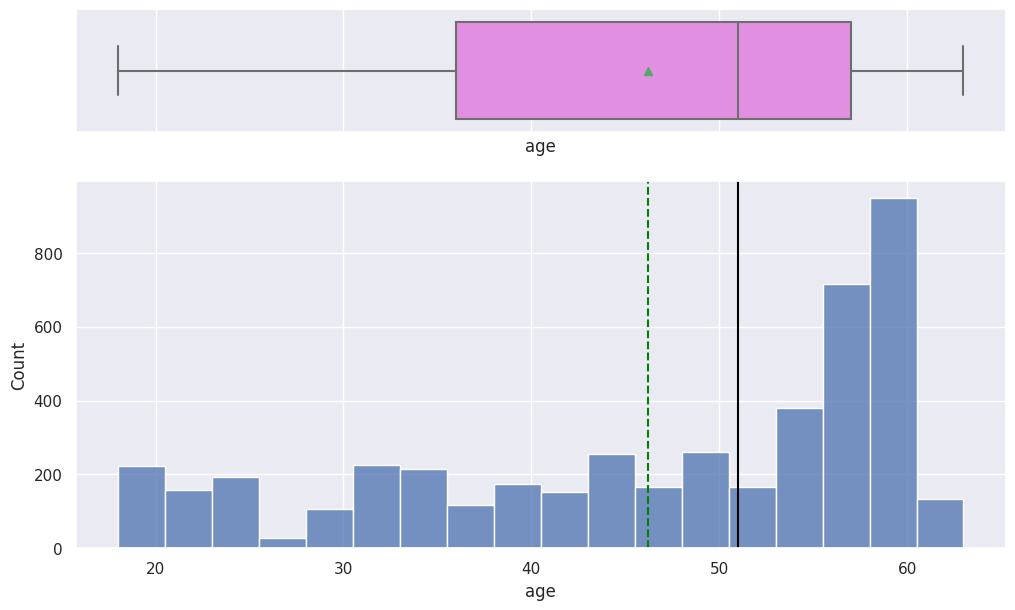

In [63]:
#plot a histogram_boxplot for age
histogram_boxplot(data, "age")

**Observations on website_visits**

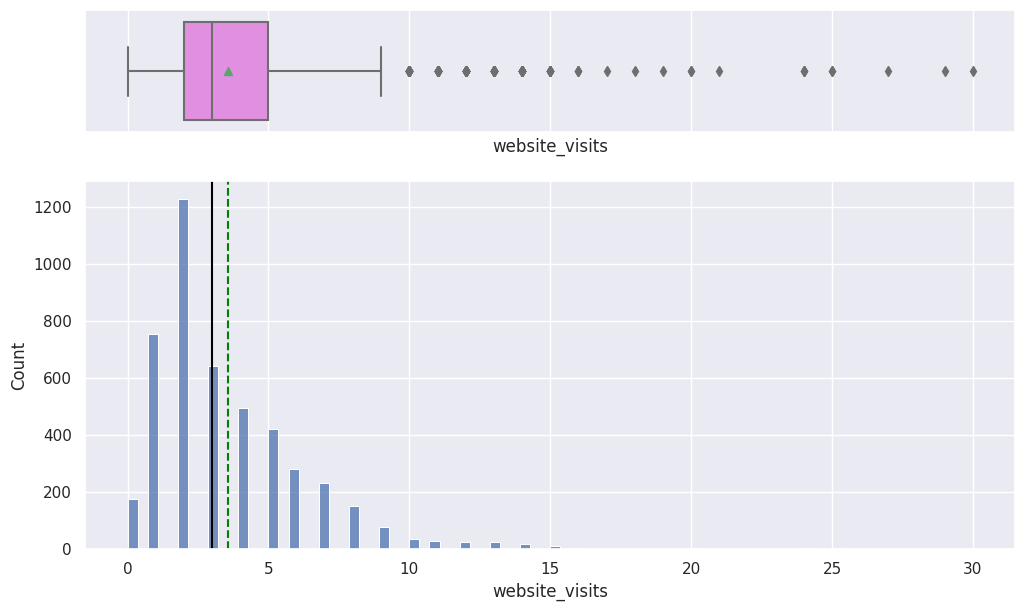

In [61]:
#plot a histogram_boxplot for website_visits
histogram_boxplot(data,"website_visits")

In [59]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

**Observations of time_spent_on_website**

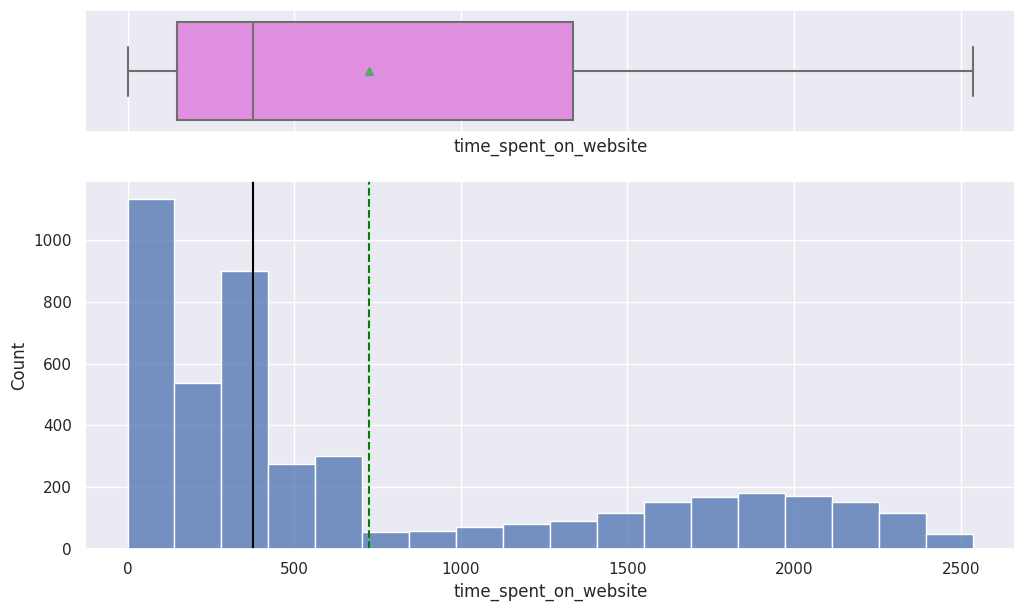

In [60]:
#plot a histogram_boxplot for time_spent_on_website
histogram_boxplot(data, "time_spent_on_website")

**Observations on number of page_views_per_visit**

In [64]:
#plot a histogram_boxplot for page_views_per_visit
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Observations on current_occupation**

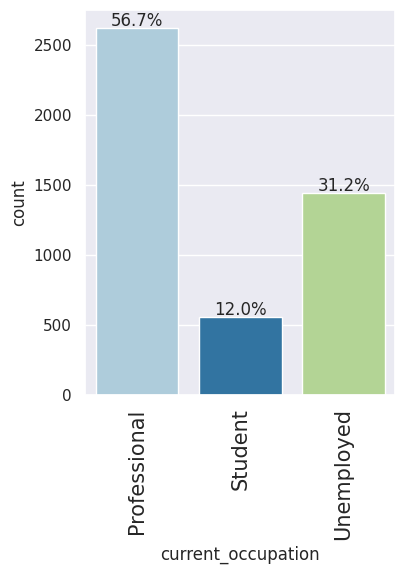

In [65]:
#plot labeled_barplot for current_occupation
labeled_barplot(data, "current_occupation", perc=True)

**Observations on number of first_interaction**

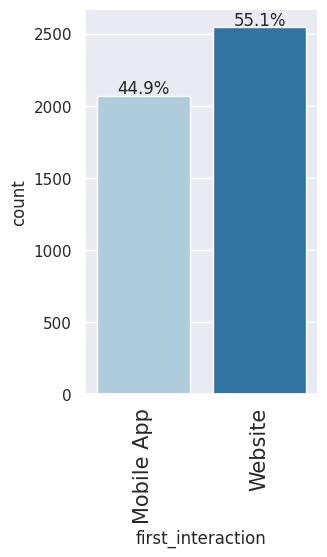

In [66]:
#plot labeled_barplot for first_interaction
labeled_barplot(data, "first_interaction", perc=True)

**Observations on profile_completed**

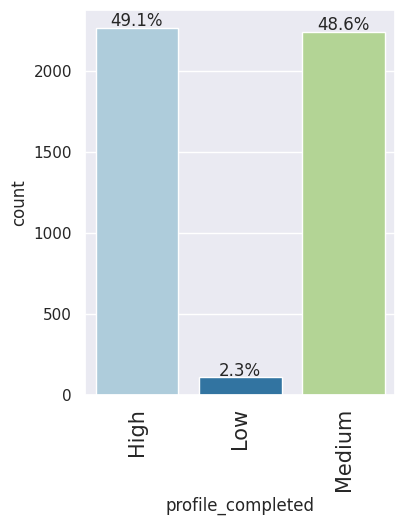

In [76]:
 #plot labeled_barplot for profile_completed
labeled_barplot(data, "profile_completed", perc=True)

**Observations on last_activity**

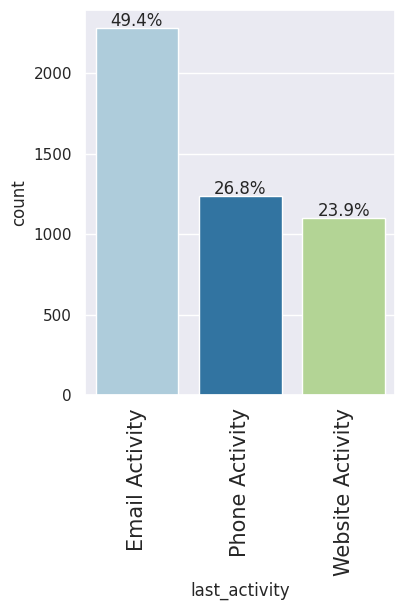

In [69]:
#plot labeled_barplot for last_activity
labeled_barplot(data,"last_activity", perc=True)

**Observations on print_media_type1**

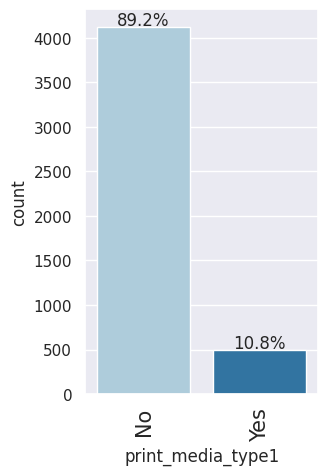

In [70]:
#plot labeled_barplot for print_media_type1
labeled_barplot(data, "print_media_type1",perc=True)

**Observations on print_media_type2**

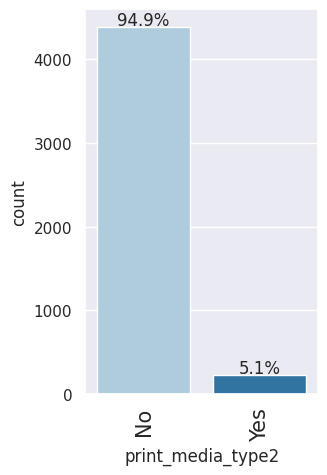

In [71]:
#plot labeled_barplot for print_media_type2
labeled_barplot(data, "print_media_type2",perc=True)

**Observations on digital_media**

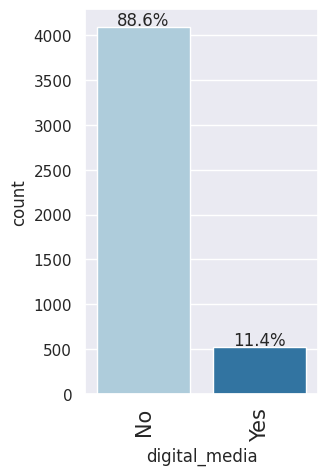

In [72]:
#plot labeled_barplot for digital_media
labeled_barplot(data,"digital_media",perc=True)

**Observations on educational_channels**

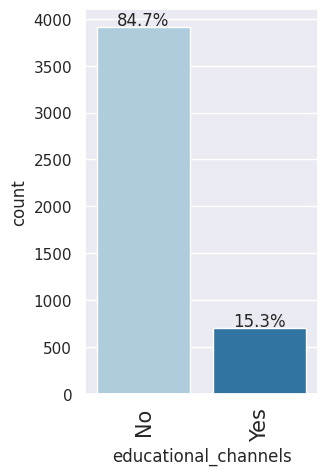

In [73]:
#plot labeled_barplot for educational_channels
labeled_barplot(data,"educational_channels", perc=True)

**Observations on referral**

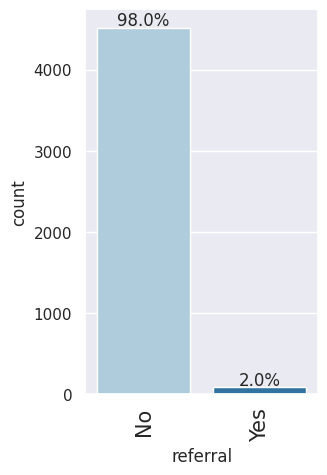

In [74]:
#plot labeled_barplot for referral
labeled_barplot(data, "referral",perc=True)

**Observations on status**

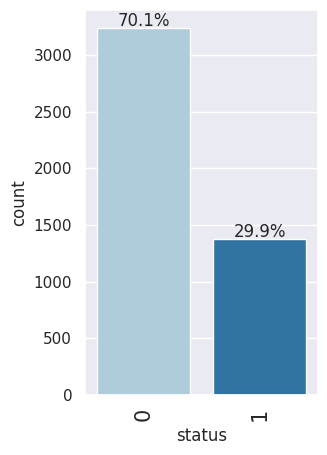

In [75]:
#plot labeled_barplot for status
labeled_barplot(data, "status",perc=True)

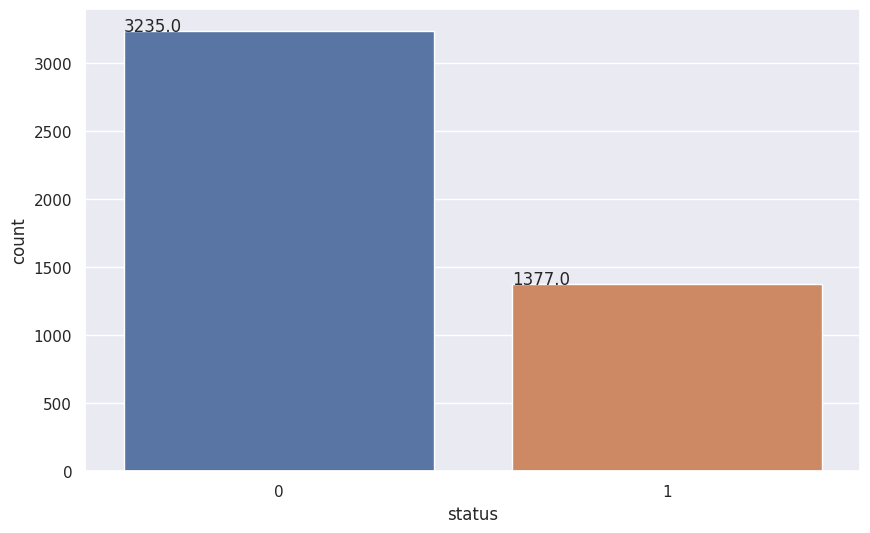

In [17]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'status', data = data)

# Annotating the exact count on the top of the bar for each category
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+ 0.35))

Observations:

* The above plot shows that number of leads converted are significantly less than number of leads not converted which can be expected.

* The plot indicates that ~30% (1377/4612) of leads have been converted.


###**Checking the distribution and outliers for numerical columns in the data**

age
Skew : -0.72


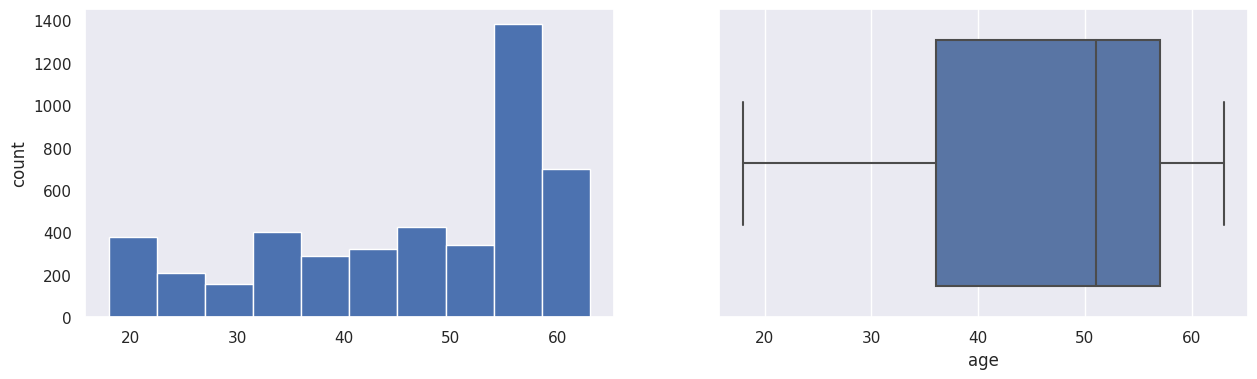

website_visits
Skew : 2.16


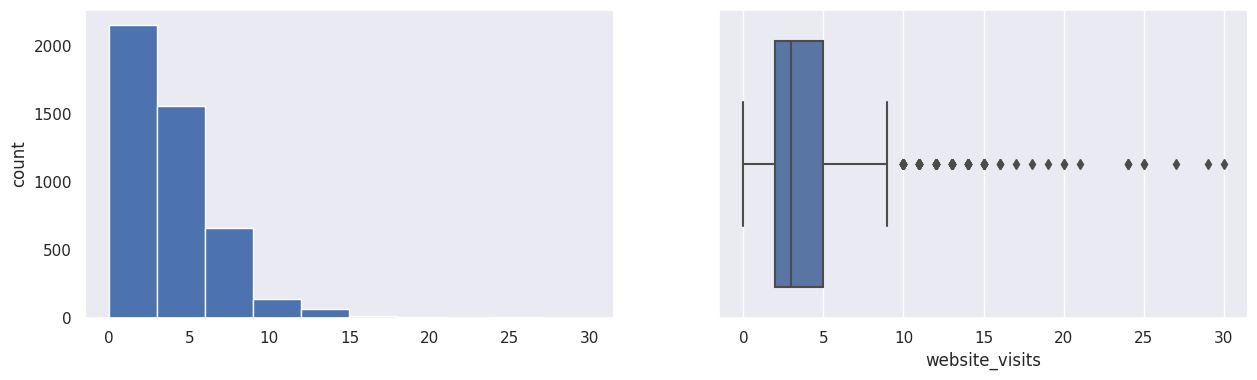

time_spent_on_website
Skew : 0.95


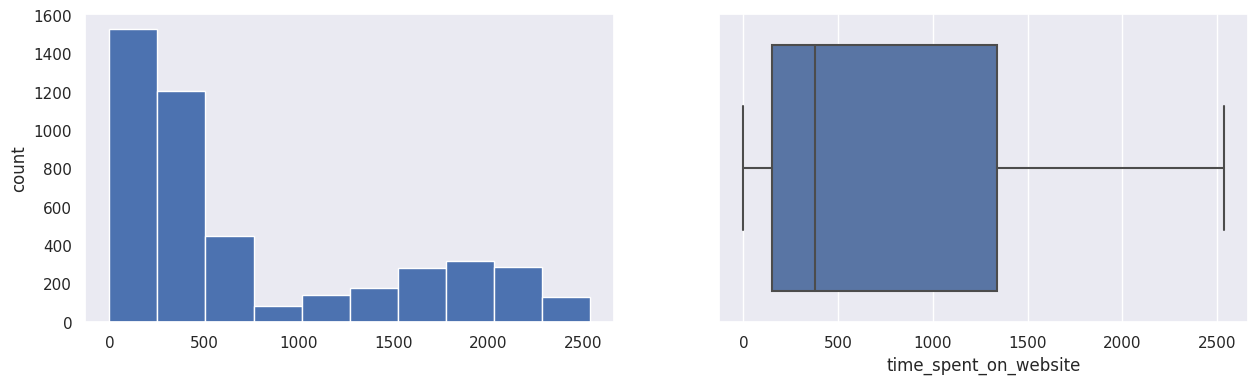

page_views_per_visit
Skew : 1.27


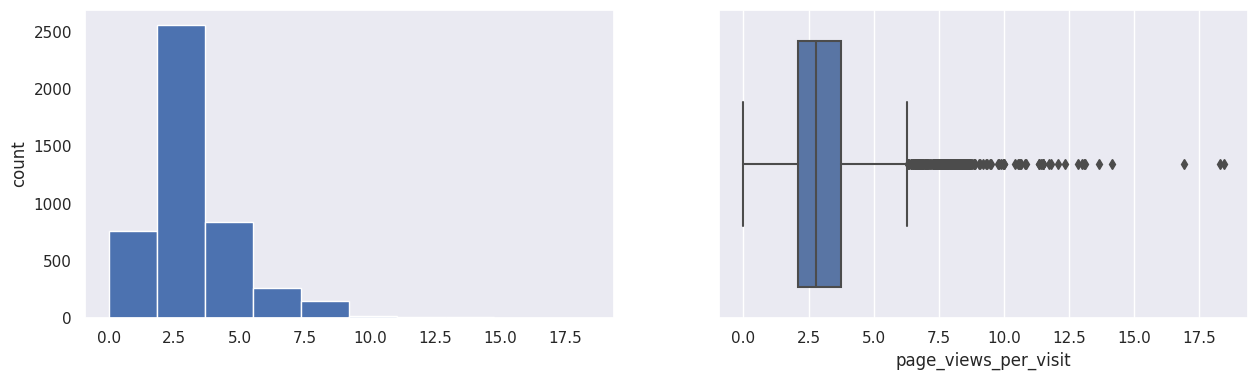

In [18]:
#Observations for distributions plots and box plots.
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)

    print('Skew :',round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

###**Observations from Univariate Analysis:**

**Age**
* The distribution of age is left-skewed which shows the majority of leads are 55 - 65 years old.

**Website_visits**
* Website visits is right-skewed which shows the majority of visits range from 0 to approximately 7 times. There are some outliers. Which means that some leads visited the website from 10 to even 30 times.

**Number of time_spent_on_website**
* Time spent on the website is right-skewed which means that most of the leads spent less than 700 seconds (~12 min) on the website.

**page_views_per_visit**
* Page views per visit distribution was approximately normal. Most leads visited 2.5 to 3.5 pages. However, there were many outliers that visited from 7.5 to more than 17.5 pages.

###**Bivariate Analysis**


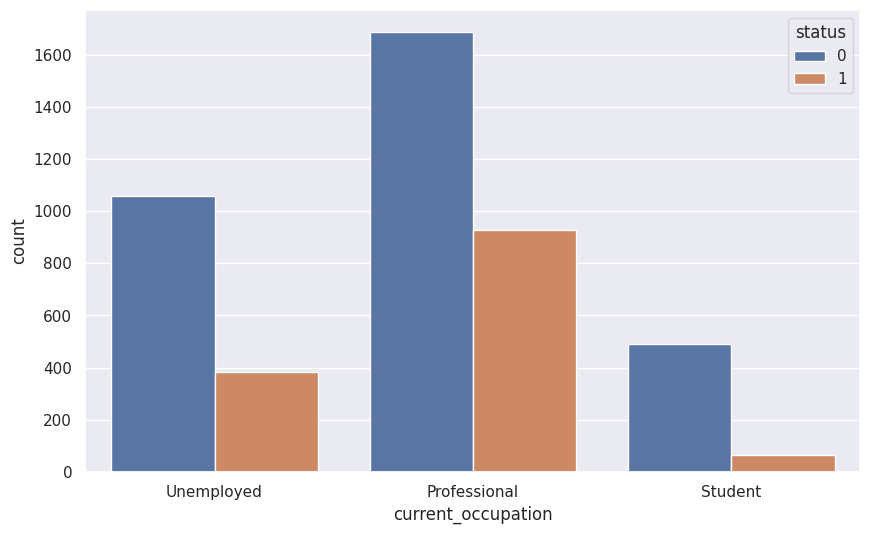

In [19]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'status', data = data)

plt.show()

**Observations**

* Leads will have different expectations from the outcome of the course and their current occupation may play a key role for them to take the program.

* The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted.

* This shows that the currently offered programs are more oriented toward working professionals or unemployed personnel. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

**Age can also be a good factor to differentiate between such leads.**

In [22]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years.

**Impact of the channels' first interaction on the conversation leads**

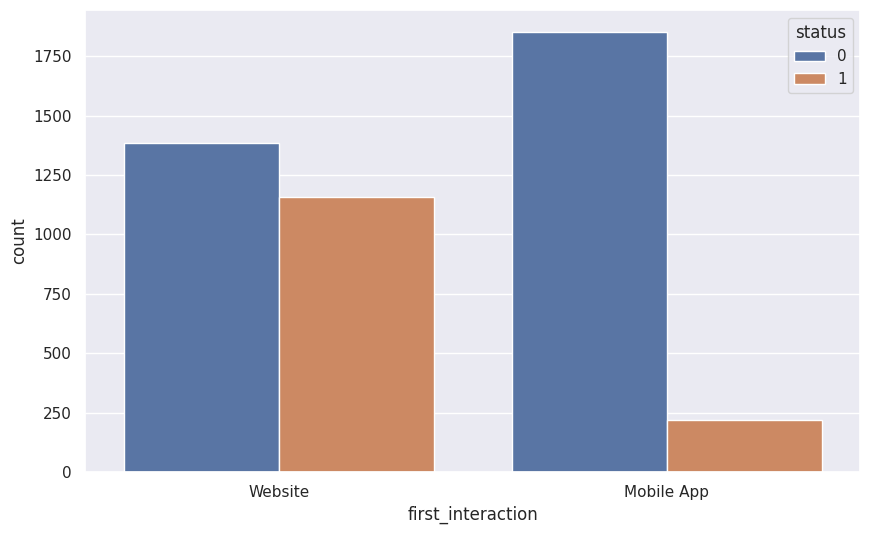

In [23]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'first_interaction', hue = 'status', data = data)

plt.show()

**Observations**


* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.

* Majority of the leads who interacted through websites were converted to paid customers, while only a small number of leads, who interacted through mobile app, converted.





**Convertion rate vs Time spent on the website**

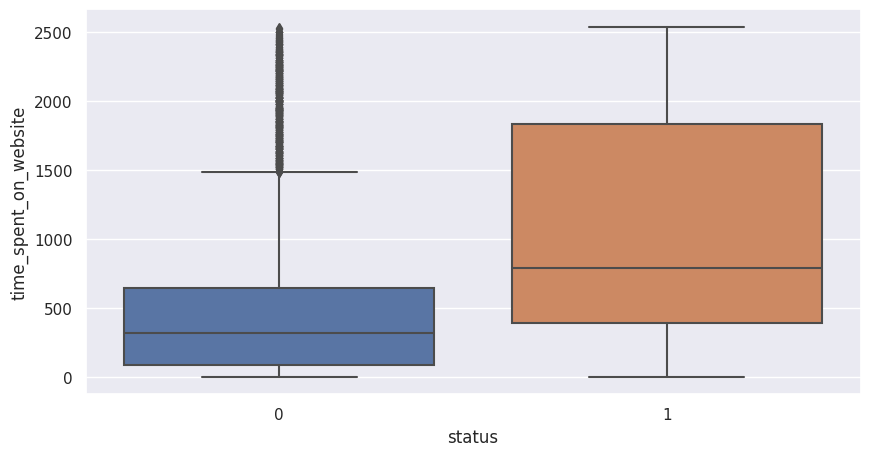

In [27]:
#Boxplot for variables 'status' and 'time_spent_on_website'


plt.figure(figsize=(10, 5))

# Use 'status' as the x-axis and 'time_spent_on_website' as the y-axis
sns.boxplot(x=data["status"], y=data["time_spent_on_website"])

plt.show()

**Observations**

* Time spent on the website is a good indicator for whether leads will buy or not. The more time is spent on the website the better the chance they converted to paid customers.

* There are many outliers through of leads that did spend more than average time on the website but still did not convert into paid customers.




**Impact analysis on profile completion level on it's lead conversion.**

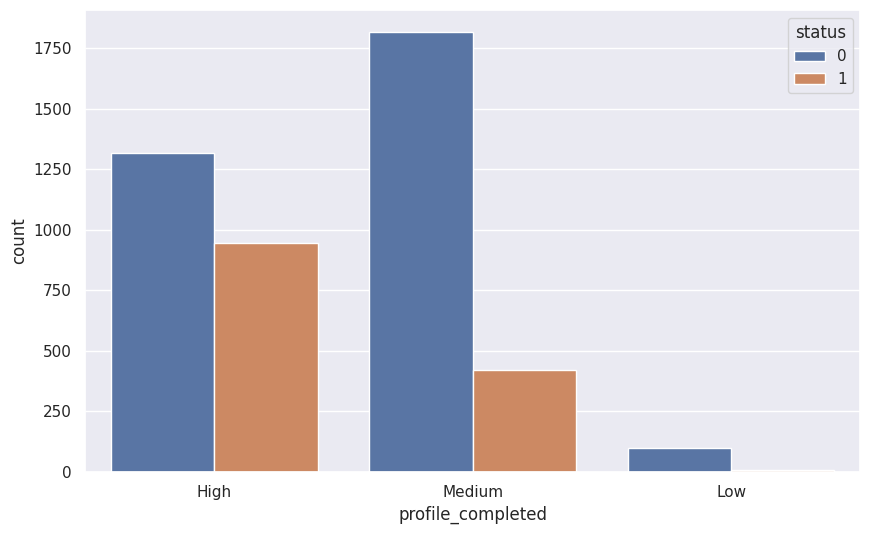

In [28]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'profile_completed', hue = 'status', data = data)

plt.show()

**Observations**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

**Let's see how referrals impact lead conversion status**


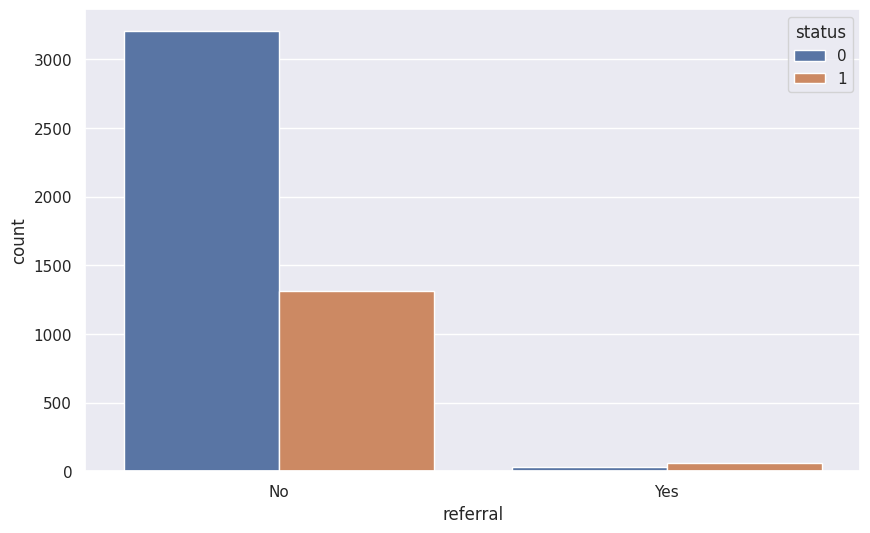

In [29]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'referral', hue = 'status', data = data)

plt.show()

**Observations**

* There are a very few referrals but the conversion is high.

* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

###**Plotting correlation heatmap**

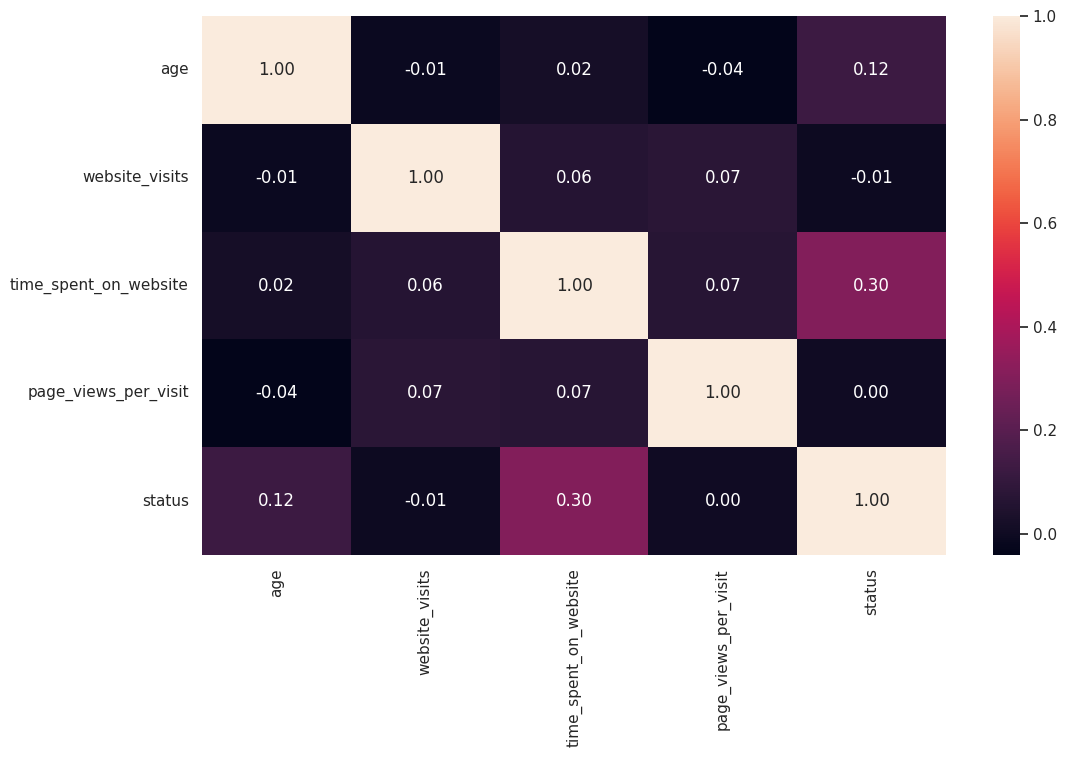

In [30]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = '.2f')

plt.show()

**Observations**

* There is a weak positive correlation between time spent on website and status. Which indicates a liklihood that the longer a lead stays on the website the better the chance of converting them to a paid customer.

* There are no other correlations.

##**Data preparation for modeling**

* We want to predict which lead is more likely to be converted.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test sets to be able to evaluate the model that we build on the train data.

In [31]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')

Y = data['status']

In [32]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [33]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Checking the shape of the train and test data**

In [34]:
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in the test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


###**Building Classification Models**

Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.

Model evaluation criterion
Model can make wrong predictions as:

 * Predicting a lead will not be converted to a paid customer but, in reality, the lead would have converted to a paid customer.

 * Predicting a lead will be converted to a paid customer but, in reality, the lead would have not converted to a paid customer.

**Which case is more important?**

 * If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.

 * If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss for the organization.

###**How to reduce the losses?**

* Company would want Recall to be maximized. The greater the Recall score, higher the chances of minimizing False Negatives.


**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**



In [35]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

##**Decision Tree**

* Fit the decision tree classifier on the training data (use random_state=7)
* Check the performance on both training and testing datasets (use metrics_score function)

In [36]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



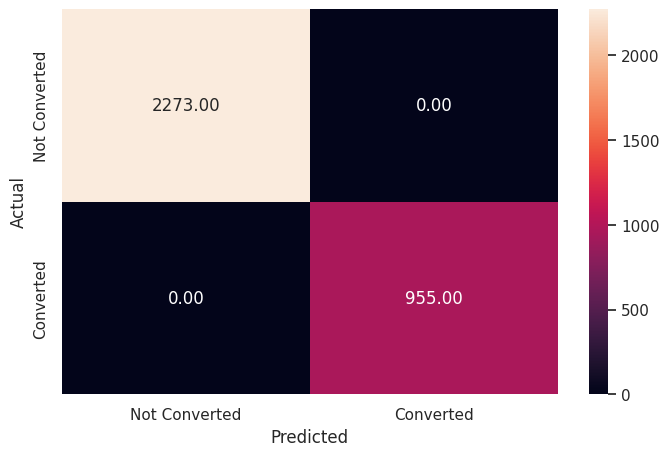

In [37]:
#Checking the performance on the training data
y_pred_train = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train)

**Confusion Matrix**

* True Positive: Predicting the lead will not convert the booking and the lead does not convert.

* False Positive: Predicting the lead will not convert and the lead is converted.

* True Negative: Predicting the lead will convert to a paid customer and the lead does convert.

* False Negative: Predicting the lead will convert to a paid customer but the lead does not converted.

**Observations:**

* There is no error on the training set, i.e., each sample has been classified.


* The Recall score is maximized. So, there is a better chance at minimizing False Negatives.

 *However, we need to see if the model is overfitting the data.


**Let's check the performance on test data to see if the model is overfitting.**



              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



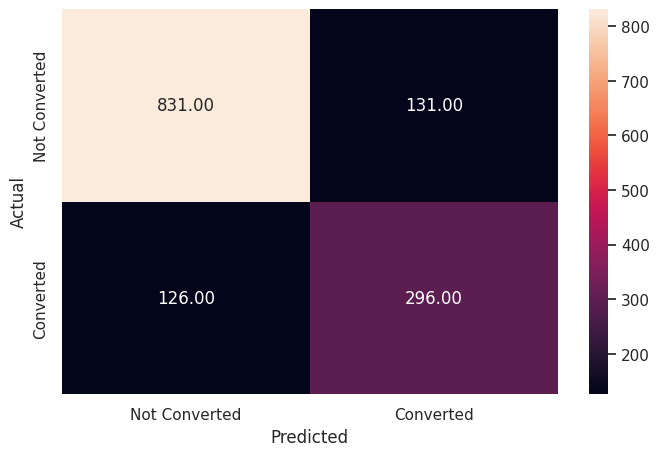

In [38]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observation**

* The decision tree model is overfitting the training data as expected and is not able to generalize well on the test set.



**Reduce Overfitting of the model by Hyperparameter Tuning**

###**Decision Tree - Hyperparameter Tuning**

In [39]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

**We have tuned the model and fit the tuned model on the training data. Now, let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



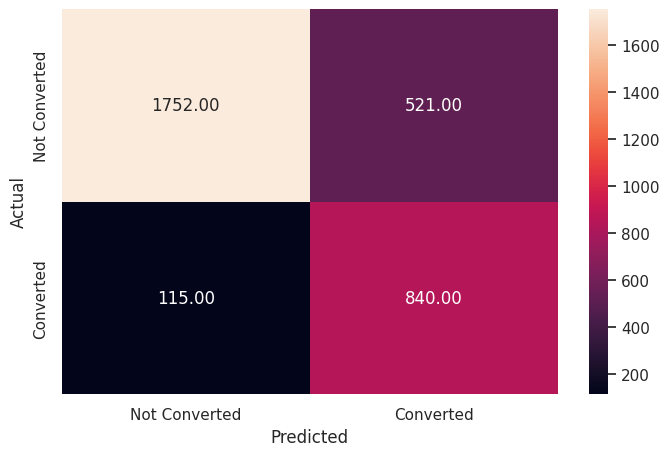

In [40]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:**

* The performance on the training data has decreased which is expected as we are trying not to overfit the training dataset.

* The model can identify the majority of unconverted leads.

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



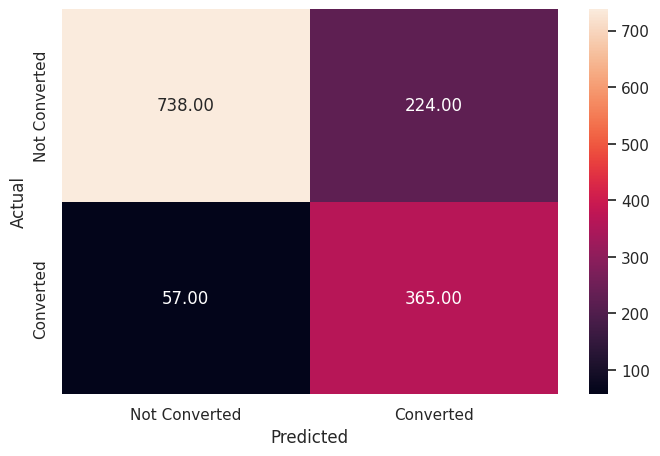

In [41]:
# Checking performance on the testing data
y_pred_test2 =  d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:**

* The recall is higher but the precision is lower.

* The overfitting has been reduced. The model is performing more generalized on both training and testing data.

**Visualization of the tuned decision tree**

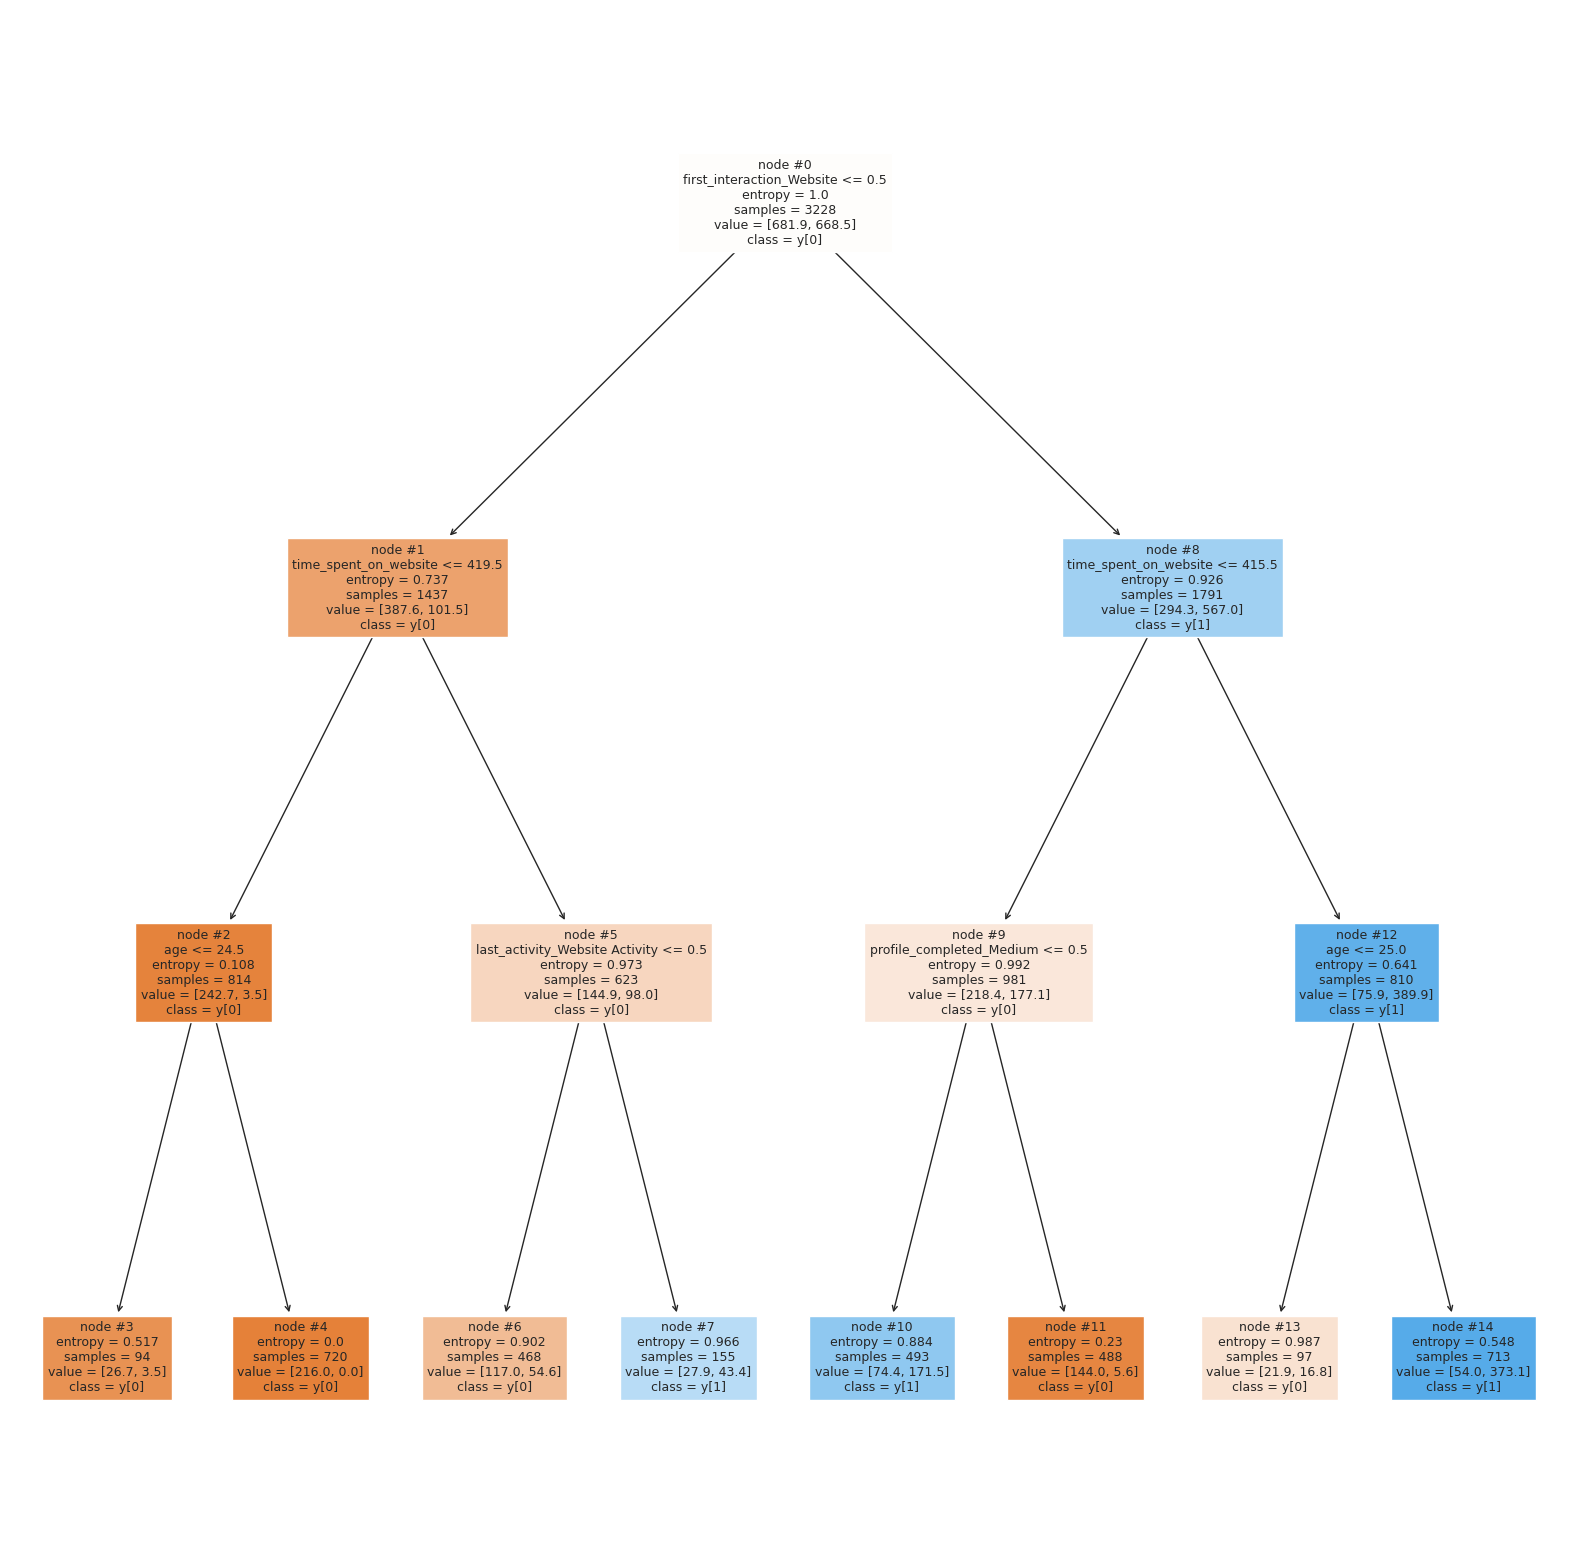

In [42]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()


Observations:

* The first split in the decision tree is at the first interaction of the website which implies that it is one of the most important factors in deciding whether the lead will be converted or not.

* As per decision rules, leads who spent more time on the website, are more likely to convert.
The leads whose age was greater than 25 are more likely to convert to paid customers.

* Leads that spent less time on the website and were younger than 25 were more like to not covert to a paid customer.


###**Importance of features of the tuned decision tree model**


In [43]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


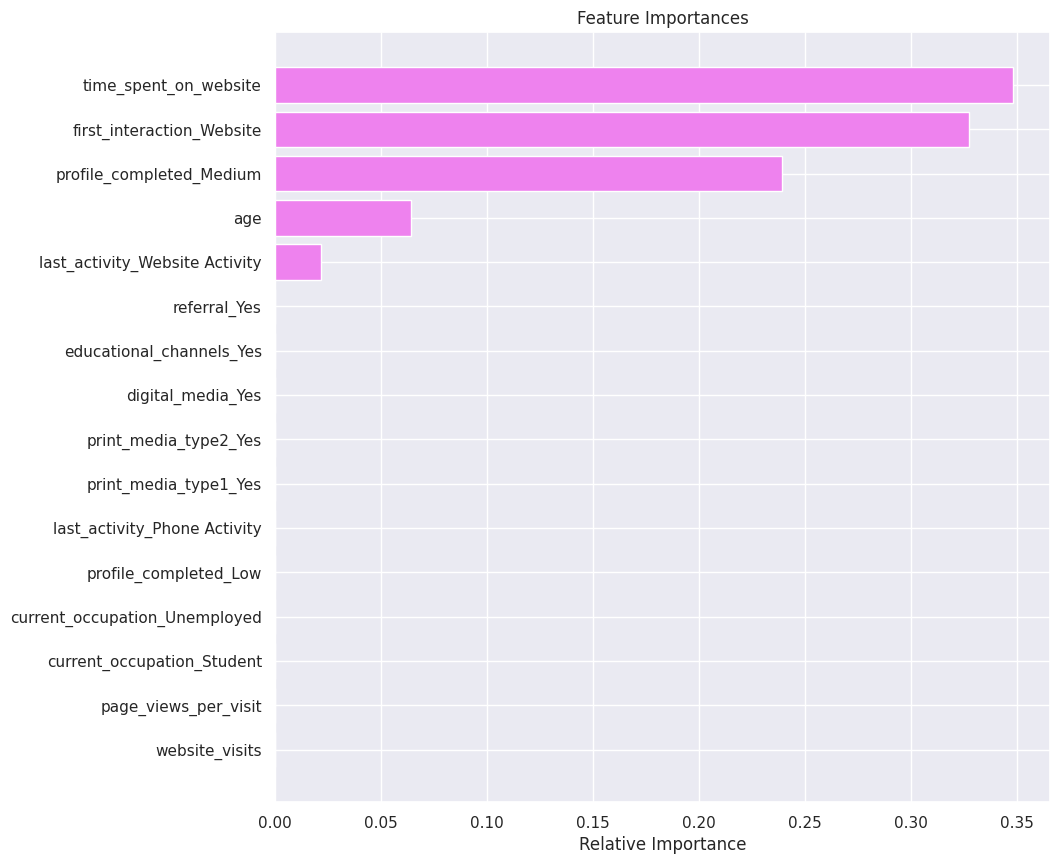

In [44]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

* Time spent on the website and first_interaction_website are the most important features followed by profile_completed, age, and last_activity.

* The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not.

##**Random Forest Classifier**

###**Building Random Forest Model**

* Fit the random forest classifier on the training data (use random_state = 7)
* Check the performance on both training and testing data (use metrics_score function)

In [45]:
# Fitting the random forest tree classifier on the training data
rf_estimator =  RandomForestClassifier(random_state = 7, criterion = "entropy")
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



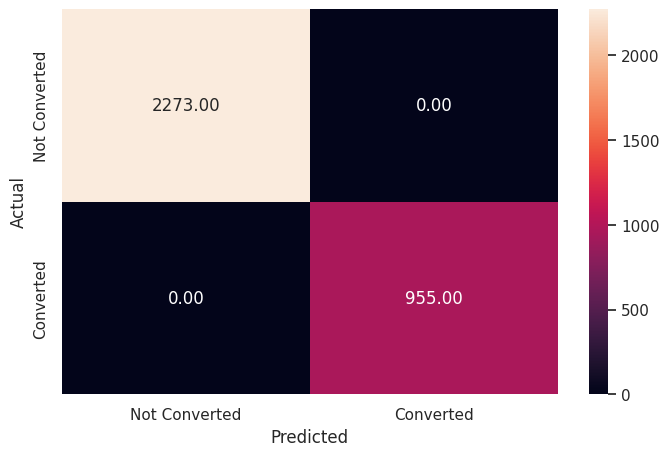

In [46]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations**

* Similar to the decision tree, the random forest is giving a perfect/better performance on the training data.
* The model is most likely overfitting to the training dataset as we observed for the decision tree.

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



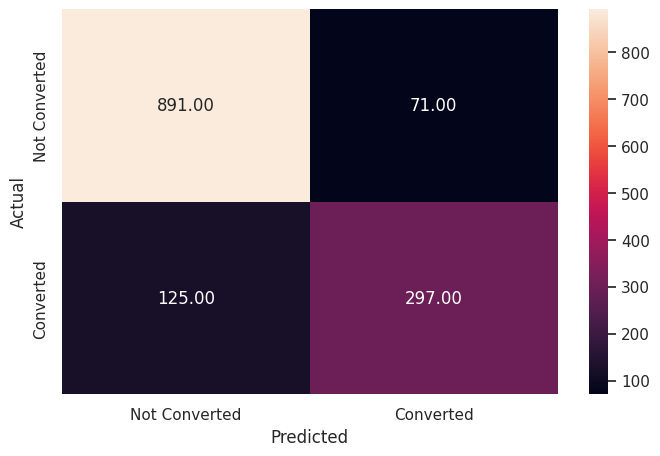

In [47]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**

* Comparatively, the results from random forest classifier were decent on both training and testing data.

* It has higher F1_Score and the precision on the testing data. The recall is lower.

**Let's see if we can get a better model by tuning the random forest classifier.**

###**Random Forest Classifier - Hyperparameter Tuning**

**Let's try tuning some of the important hyperparameters of the Random Forest Classifier.**

We will not tune the criterion hyperparameter as we know from hyperparameter tuning for decision trees that entropy is a better splitting criterion for this data.

In [49]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [50]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



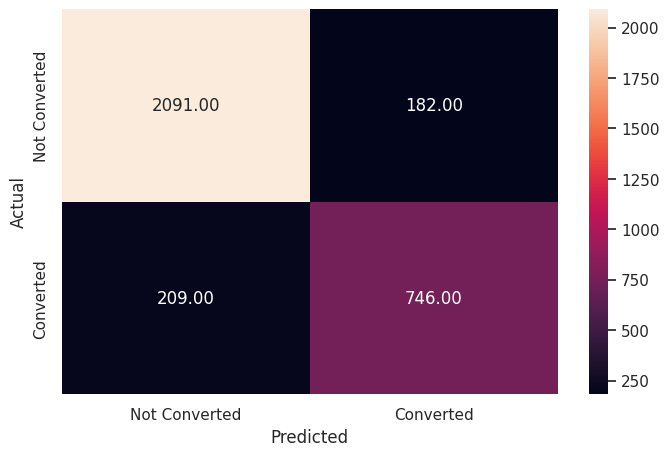

In [51]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**

* We can see that after hyperparameter tuning, the model is performing poorly on the train data as well.

* We can try adding some other hyperparameters and/or changing values of some hyperparameters to tune the model and see if we can get better performance.

**Note: GridSearchCV can take a long time to run depending on the number of hyperparameters and the number of values tried for each hyperparameter. Therefore, we have reduced the number of values passed to each hyperparameter.**

* Tune the random forest classifier using GridSearchCV
* Check the performance on both training and testing datasets
* Compare the results with the results from the random forest model with default parameters

In [52]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

**Let's check the model performance on the test data**


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



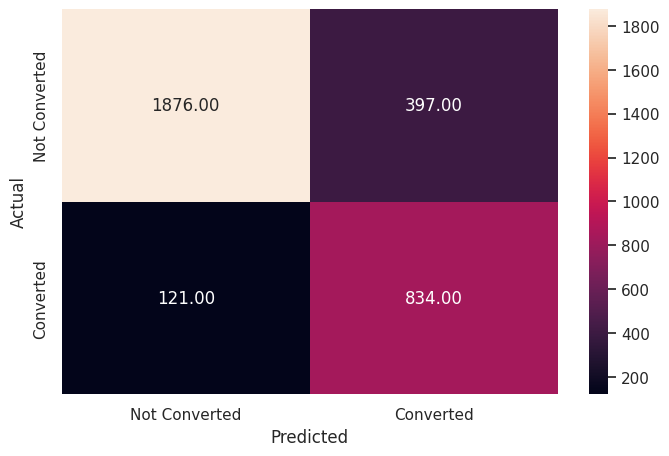

In [53]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:**

* The recall improved, everything else decreased.


###**Let's check the model performance on the test data**



              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



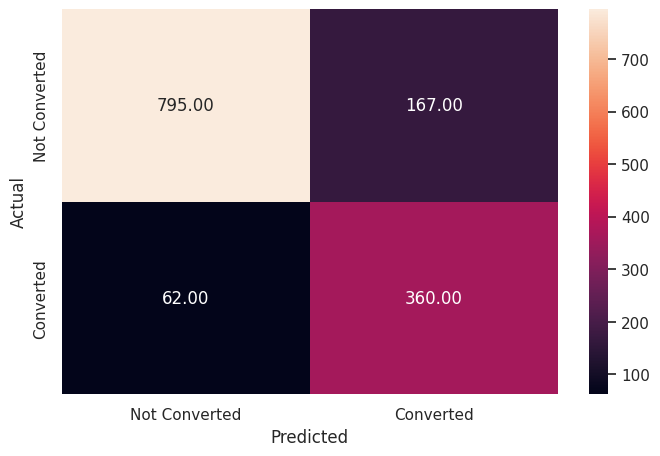

In [54]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**

* The precision, recall, and f1-score is lower for the random forest with default parameters.

* The tuned random forest models have a higher precision, recall, and f1-score which makes these a better potential model for identifying which leads are going to get converted.

* One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.

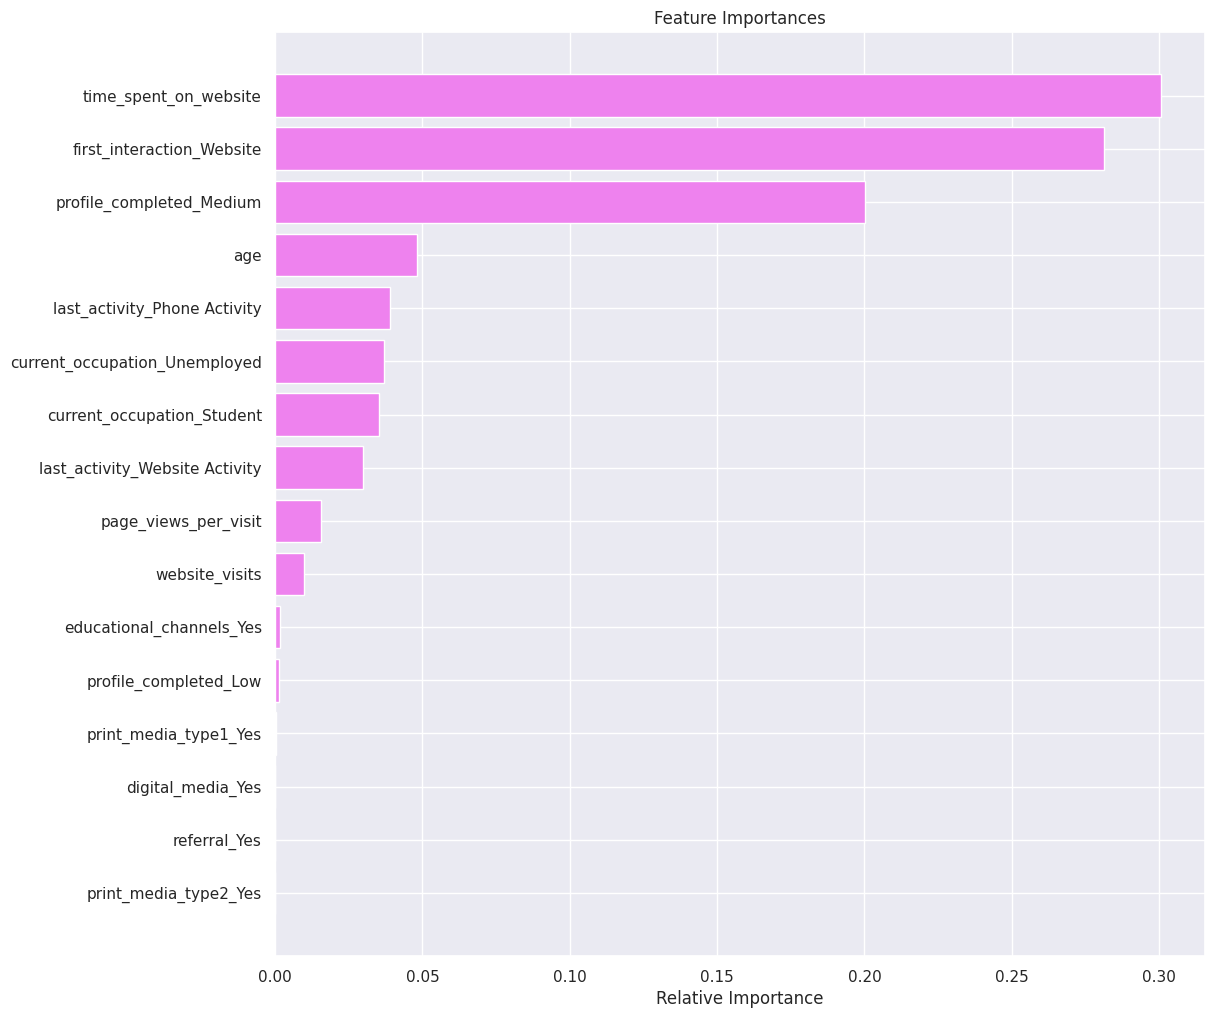

In [55]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

* Similar to the decision tree model, time spent on website, first_interaction_website, profile_completed, and age are the top four features that help distinguish between not converted and converted leads.

* Unlike the decision tree, the random forest gives some importance to other variables like occupation, page_views_per_visit, as well. This implies that the random forest is giving importance to more factors in comparison to the decision tree.

##**Conclusion and Recommendations**

###**Conclusions:**

* Our primary objective is to maximize the Recall value because a higher Recall score corresponds to a lower likelihood of False Negatives. This, in turn, increases our ability to predict whether a lead will convert or not.

* We have successfully developed tree-based models that the company can utilize to forecast which leads are likely to convert, enabling them to devise tailored marketing strategies.

* Specifically, our fine-tuned random forest model has achieved an impressive Recall score of 85% and a macro average of 84% on the test dataset.

* Unlike the decision tree, the random forest gives some importance to other variables like occupation, page_views_per_visit, as well. This implies that the random forest is giving importance to more factors in comparison to the decision tree.

* Looking at important variables, based on the feature importances, we can say that the time_spent_on_website, age, profile_completion, and age, are the major factors of the model.

* The Decision tree model is highly overfitting the training data and gives an Recall score of 86% on the test data. The tuned Decision Tree model is very balanced and gives more generalized results on both training and testing data.

* By employing the tuned random forest model, which boasts an 85% Recall score along with respectable precision and F1 scores, the company gains the capability to predict leads that are likely to convert. This empowers the company to focus their marketing efforts on potential leads with a higher likelihood of conversion.



###**Business Recommendations:**

* The amount of time a lead invests on the website can serve as a crucial factor in determining whether they will ultimately convert or not. Our observations reveal a positive correlation: the longer a lead engages with the website, the higher the likelihood of conversion.

* To enhance their conversion rates, the company should allocate resources towards the enhancement of their website, making it more appealing and engaging to attract and retain the attention of potential leads.

* We also noticed that leads who took the initiative to complete their profiles had an increased probability of converting. To encourage more leads to complete their profiles, offering incentives such as discounts could be an effective strategy.

* Furthermore, our analysis indicates that older leads exhibit a greater propensity to convert. Consequently, it would be beneficial for the company to tailor their marketing efforts to target older adults, as this demographic appears more likely to convert into customers.